## Business Understanding


### Overview
Tax authorities often struggle to efficiently identify taxpayers who pose compliance risks, resulting in revenue leakage and ineffective audit targeting. With limited resources, it's essential to prioritize audits based on risk levels. This project leverages historical taxpayer data to build a machine learning model that classifies taxpayers into High, Medium, or Low Risk categories. The insights generated can support smarter enforcement, better resource allocation, and improved tax compliance outcomes.



### Business Problem
Tax authorities need a reliable way to identify and prioritize risky taxpayers for audits and enforcement. 
This project seeks to develop a predictive model that uses taxpayer data to classify risk levels and enable more targeted, efficient compliance actions.

To address this, we aim to:
- Predict taxpayers who pose a high compliance risk.
- Identify industries that are more prone to non-compliance.
- rovide actionable insights to audit teams for targeted enforcement decisions.


## Data Understanding
The dataset being used for this project was obtained from kaggle. Here, we are going to review the dataset to assess the structure and characteristics of the data.

In [1]:
#importing necessary liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
#from imblearn.over_sampling import SMOTE

In [2]:
#loading our data, that is in csv format
imported_data = pd.read_csv("../data/tax_risk_dataset.csv")

In [3]:
#make a copy of the original data
data=imported_data.copy()

In [4]:
# displaying the first five rows of our data
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


In [5]:
# displaying the las 5 records of our data
data.tail()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
995,996,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0.0,High
996,997,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,844610.21,0.51,9,0.0,High
997,998,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,668627.79,1.43,0,0.0,Medium
998,999,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0.0,High
999,1000,1171774.83,551019.47,47671.11,51606.48,3,2,Tech,620755.36,1.08,9,0.0,High


In [6]:
#knowing the number of rows and columns
data.shape

(1000, 13)

The data has 1000 rows and 13 columns.

In [18]:
# Get general information on the data and each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Revenue                1000 non-null   float64
 1   Expenses               1000 non-null   float64
 2   Tax_Liability          1000 non-null   float64
 3   Tax_Paid               1000 non-null   float64
 4   Late_Filings           1000 non-null   int64  
 5   Compliance_Violations  1000 non-null   int64  
 6   Industry               1000 non-null   object 
 7   Profit                 1000 non-null   float64
 8   Tax_Compliance_Ratio   1000 non-null   float64
 9   Audit_Findings         1000 non-null   int64  
 10  Risk_Label             1000 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 86.1+ KB


We have found out that:
- 4 columns are of integer datatype.
- 7 columns are of datatype float.
- There are 2 columns with object datatype.

In [19]:
#get the summary statistics of the columns that contain numerical data.
data.describe()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.029000,1.033000,2.916324e+05,1.077180,4.396000
std,2.937648e+05,1.994909e+05,14751.814482,10271.325437,1.415685,0.812756,3.617036e+05,0.617086,2.927414
min,2.761980e+04,1.119223e+05,4707.320000,18705.510000,0.000000,0.000000,-7.801314e+05,0.240000,0.000000
25%,8.057229e+05,5.787517e+05,40280.002500,40625.797500,1.000000,0.000000,4.100442e+04,0.767500,2.000000
50%,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.000000,1.000000,2.856810e+05,0.970000,4.000000
75%,1.194383e+06,8.457764e+05,59913.732500,54669.455000,3.000000,2.000000,5.514364e+05,1.210000,7.000000
max,2.155819e+06,1.338622e+06,108893.570000,80430.930000,4.000000,2.000000,1.401163e+06,10.190000,9.000000


As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

## Data prearation

#### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values.

In [11]:
#Dropping unnecesarry columns
data.drop(columns=["Taxpayer_ID","Audit_to_Tax_Ratio"],inplace=True)
data.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


In [20]:
# validating that there are no missing values
data.isna().sum()

Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Risk_Label               0
dtype: int64

In [32]:
#check for duplicates
data.duplicated().sum()

0

## Exploratory Data Analysis

### Distribution of numerical features

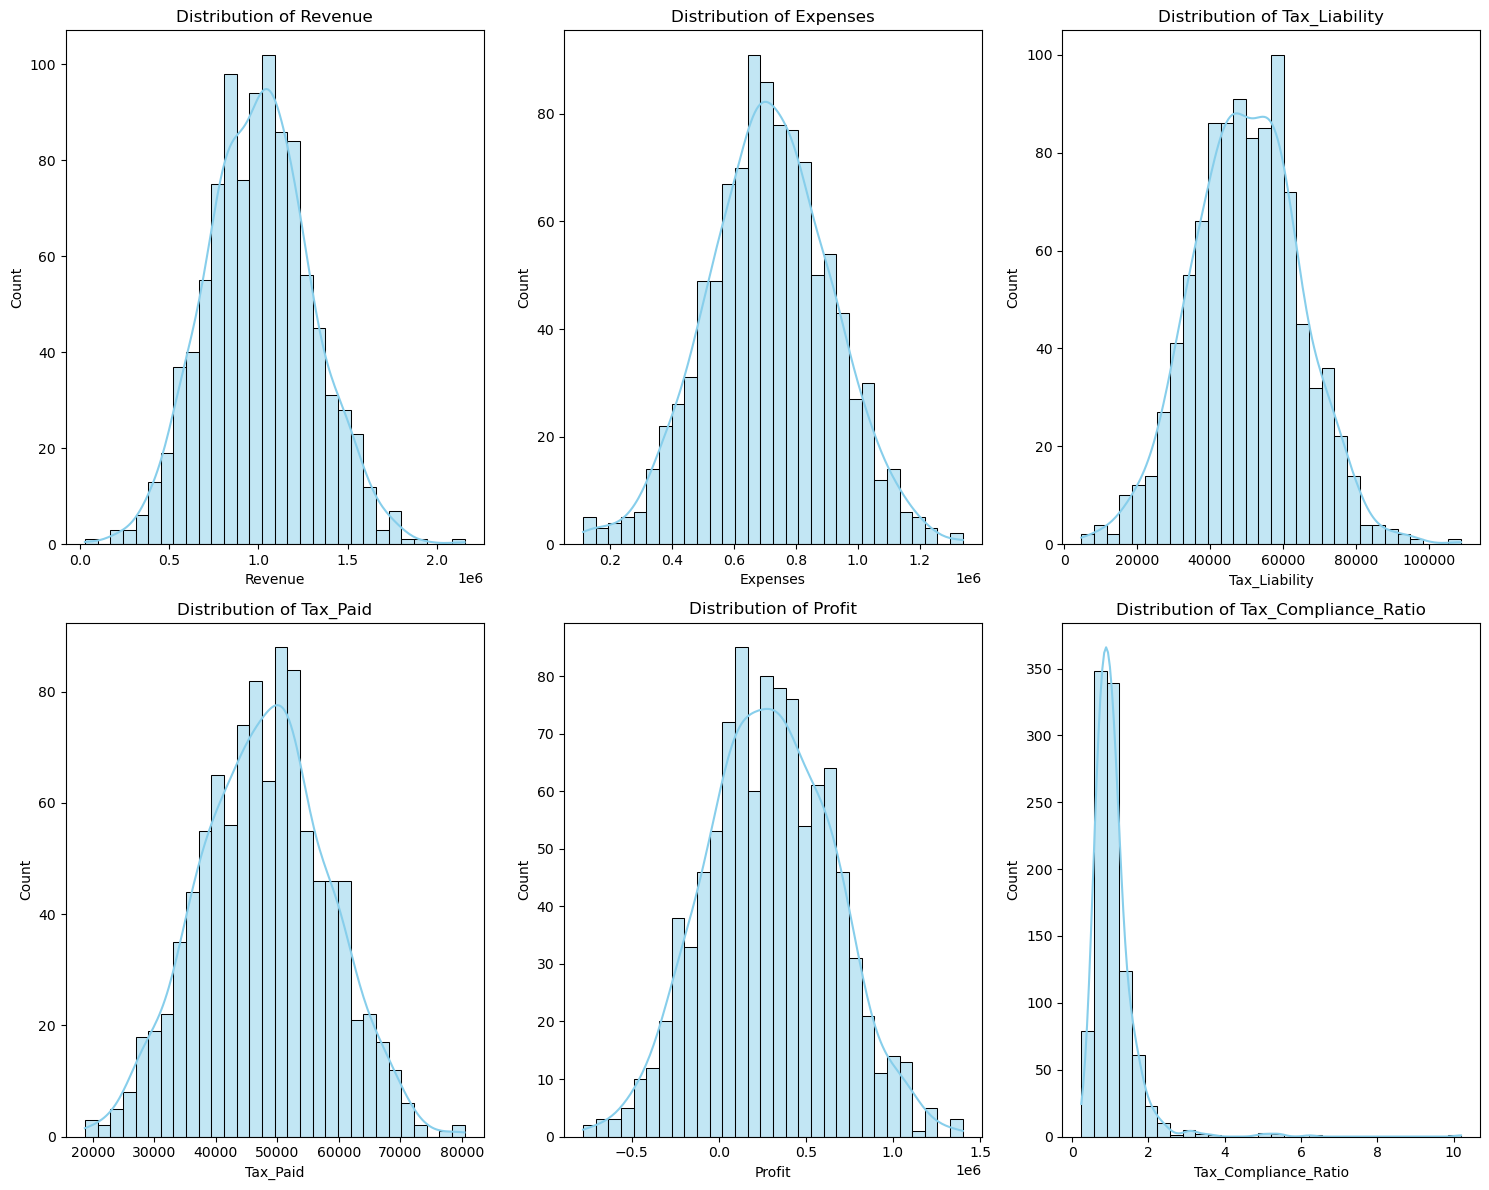

In [21]:
# Numerical columns after dropping Taxpayer_ID and Audit_to_Tax_Ratio
numeric_cols = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
                'Profit', 'Tax_Compliance_Ratio']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Count plot Risk_Label 

In [43]:
# checking how the Risk_Label column is balanced
data["Risk_Label"].value_counts()

Risk_Label
High      736
Low       152
Medium    112
Name: count, dtype: int64

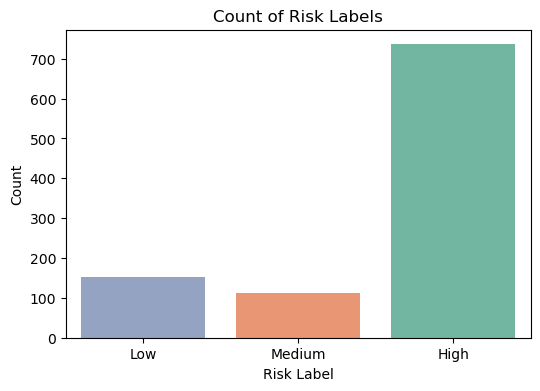

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Risk_Label', hue='Risk_Label', order=['Low', 'Medium', 'High'], palette='Set2', legend=False)
plt.title('Count of Risk Labels')
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.show()

### Count Plot of Industry

In [44]:
# checking how the industry column is balanced
data["Industry"].value_counts()

Industry
Retail           233
Finance          213
Tech             188
Healthcare       188
Manufacturing    178
Name: count, dtype: int64

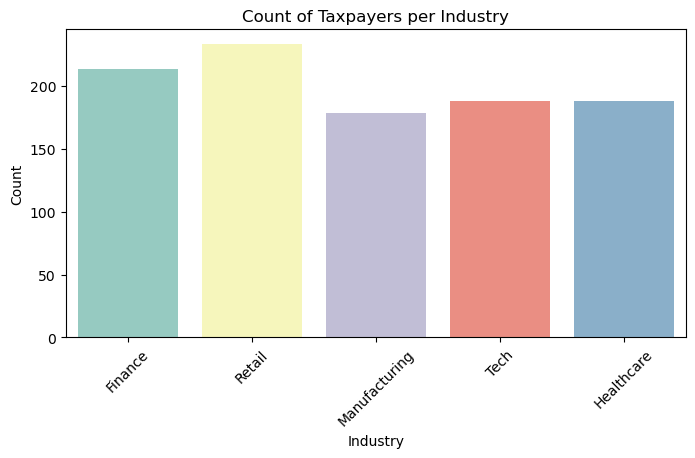

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Industry', hue='Industry', palette='Set3', legend=False)
plt.title('Count of Taxpayers per Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Industry by Risk_label

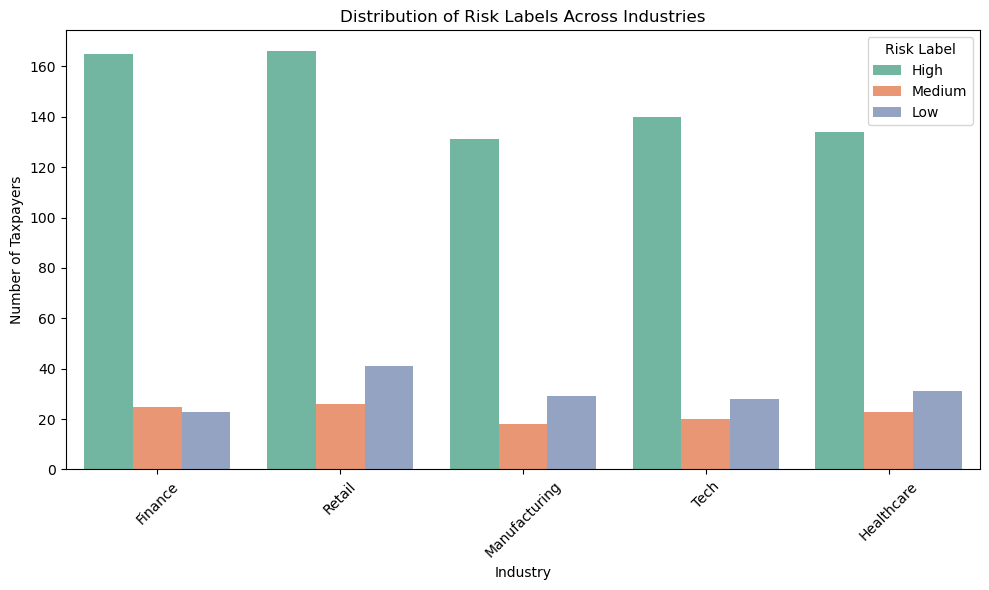

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Industry', hue='Risk_Label', palette='Set2')

plt.title('Distribution of Risk Labels Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Taxpayers')
plt.legend(title='Risk Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
data.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


#### Relationship between Risk_label and columns with numerical data i.e Revenue, Expenses, Tax_Liability, Tax_Paid, Late_Filings, Compliance_Violations, Profit,Tax_Compliance_Ratio and Audit_Findings

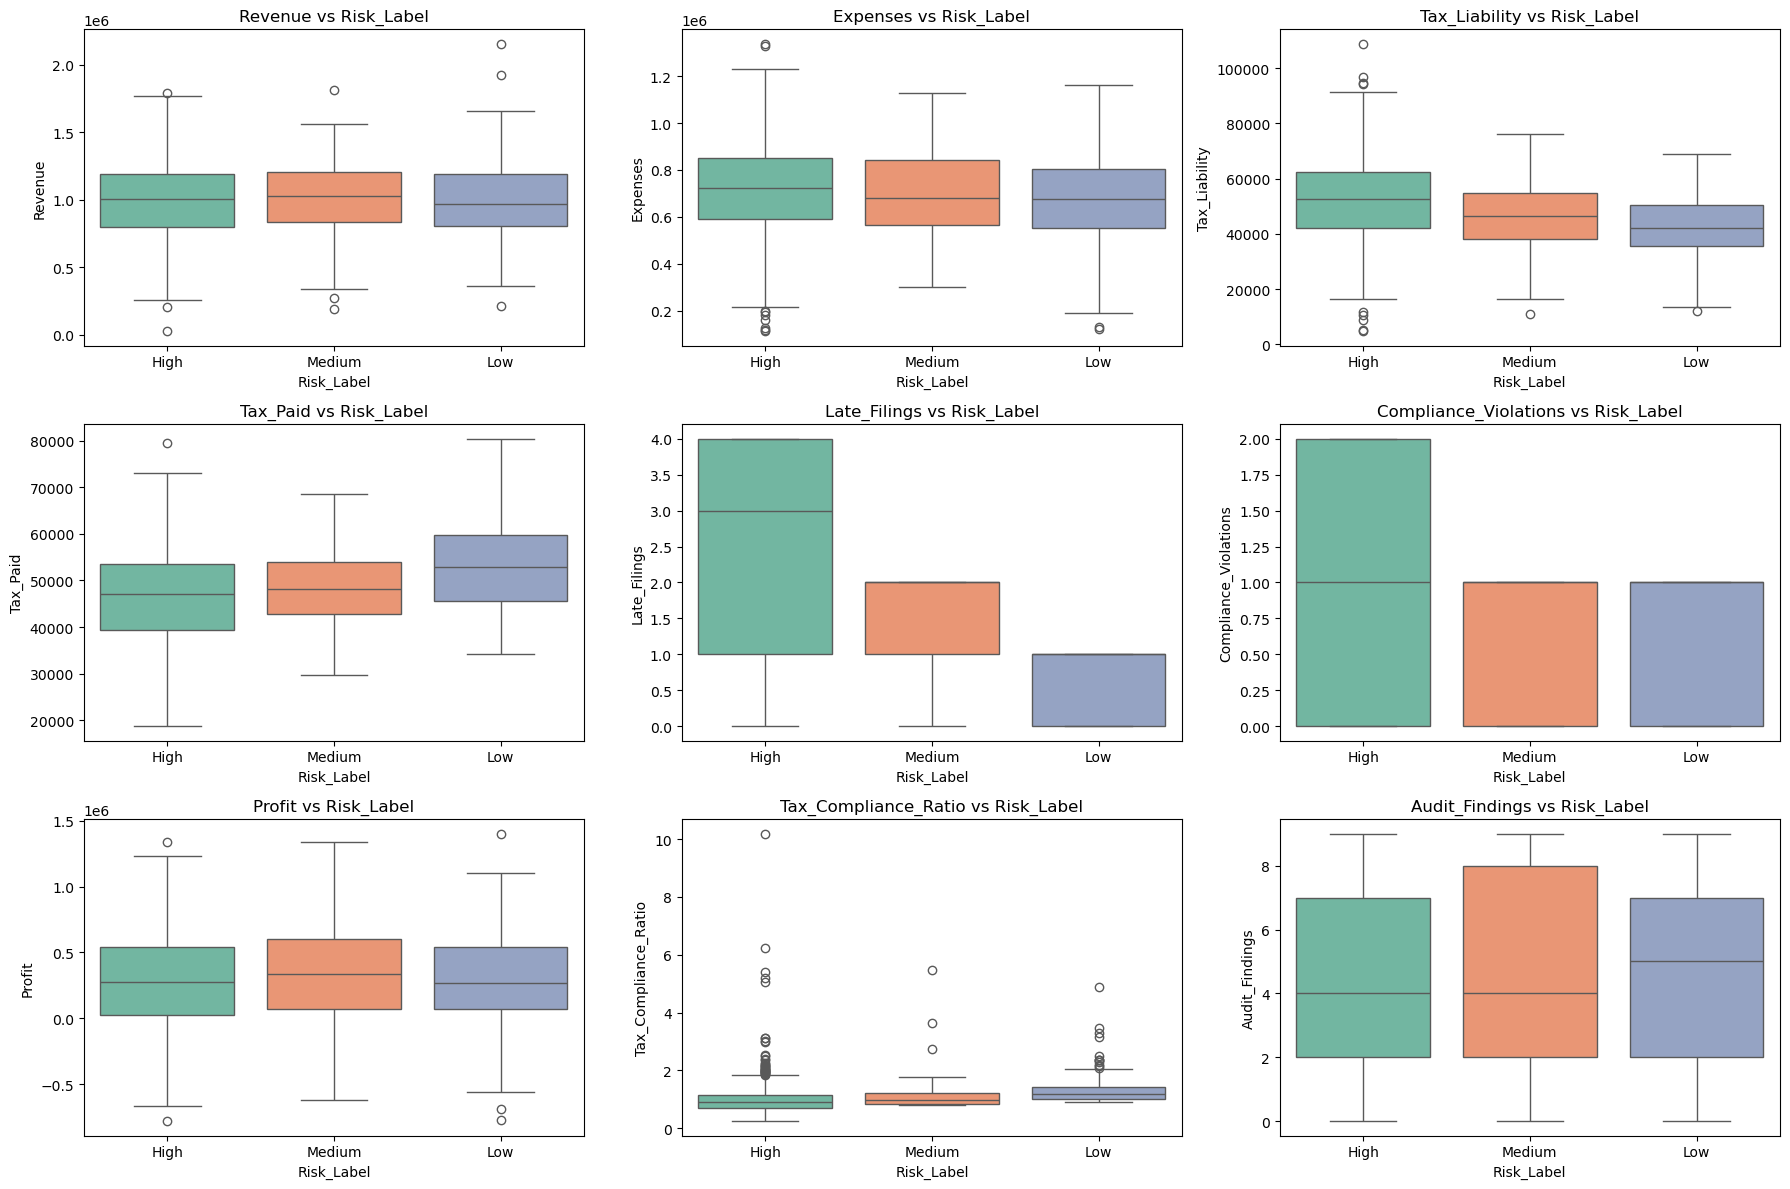

In [31]:
# Select only numerical columns (excluding 'Industry' and 'Risk_Label')
columns = data.drop(columns=['Industry', 'Risk_Label'], axis=1).columns

# Set up a grid of subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, col in enumerate(columns):
    sns.boxplot(data=data, x='Risk_Label', y=col, ax=axes[i], hue='Risk_Label', palette='Set2', legend=False)
    axes[i].set_title(f'{col} vs Risk_Label')
    axes[i].set_xlabel('Risk_Label')
    axes[i].set_ylabel(col)

# In case there are fewer columns than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # remove unused axes
    
plt.tight_layout()
plt.show()

### Correlation Analysis

In [42]:
# # Plot heatmap
# num_data=data.select_dtypes(include="number")
# plt.figure(figsize=(16, 6))
# correlation_matrix = num_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')

# plt.show()

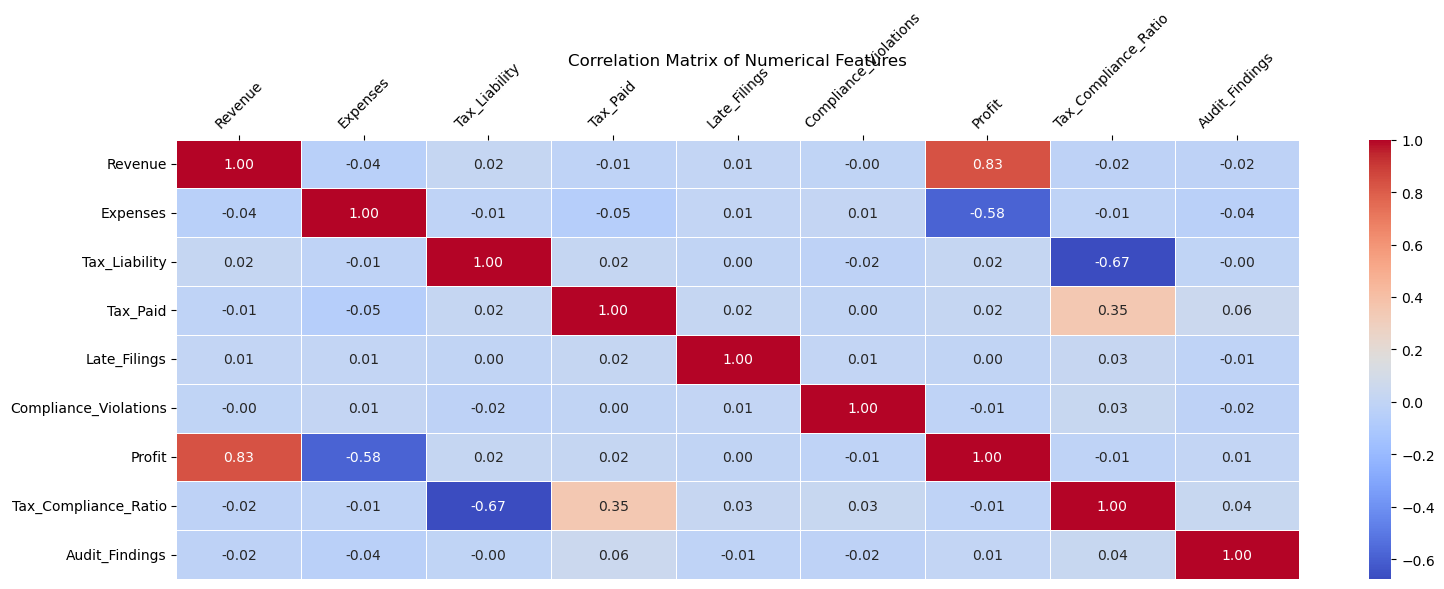

In [41]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # move ticks
ax.xaxis.set_label_position('top')  # move labels
plt.xticks(rotation=45)  # rotate x labels for readability
plt.title("Correlation Matrix of Numerical Features", y=1.15)  # push title up

plt.tight_layout()
plt.show()